In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
%matplotlib inline

In [227]:
taxi_train_data = pd.read_csv('train.csv', nrows = 10000000)

In [228]:
#taxi_train_data.head()

In [229]:
taxi_train_data.shape

(10000000, 8)

In [260]:
taxi_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9761862 entries, 0 to 9999999
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    int64  
 8   pickup_time        int64  
 9   pickup_weekday     int64  
 10  pickup_month       int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 893.7+ MB


In [261]:
taxi_test_data = pd.read_csv('test.csv')

In [32]:
#taxi_test_data.head()

In [231]:
taxi_test_data.shape

(9914, 19)

In [232]:
taxi_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9914 non-null   int64  
 1   key              9914 non-null   object 
 2   passenger_count  9914 non-null   int64  
 3   pickup_time      9914 non-null   int64  
 4   pickup_month     9914 non-null   int64  
 5   pickup_lga       9914 non-null   float64
 6   dropoff_lga      9914 non-null   float64
 7   pickup_jfk       9914 non-null   float64
 8   dropoff_jfk      9914 non-null   float64
 9   pickup_ewr       9914 non-null   float64
 10  dropoff_ewr      9914 non-null   float64
 11  distance         9914 non-null   float64
 12  Friday           9914 non-null   int64  
 13  Monday           9914 non-null   int64  
 14  Saturday         9914 non-null   int64  
 15  Sunday           9914 non-null   int64  
 16  Thursday         9914 non-null   int64  
 17  Tuesday       

In [233]:
def diff_long_lat(data):
    data['Diff_long'] = np.abs(data['pickup_longitude'] - data['dropoff_longitude'])
    data['Diff_lat'] = np.abs(data['pickup_latitude'] - data['dropoff_latitude'])

diff_long_lat(taxi_train_data)
#diff_long_lat(taxi_test_data)

(0.0, 5.0)

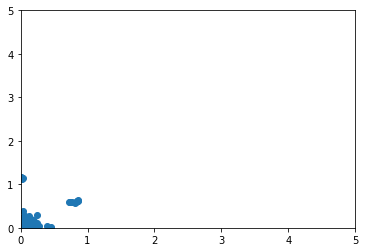

In [235]:
plt.scatter(taxi_train_data['Diff_long'][:25000].values, taxi_train_data['Diff_lat'][:25000].values)
plt.xlim(0, 5)
plt.ylim(0, 5)

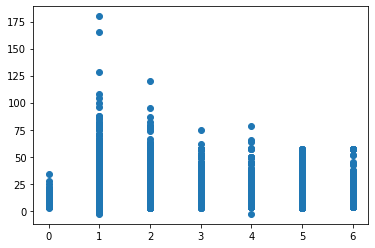

In [237]:
plt.scatter(taxi_train_data['passenger_count'][:25000].values, taxi_train_data['fare_amount'][:25000].values)

In [248]:
print(f'Мин. количество пассажиров: {min(taxi_train_data["passenger_count"])}')
print(f'Макс. количество пассажиров: {max(taxi_train_data["passenger_count"])}')

Мин. количество пассажиров: 0
Макс. количество пассажиров: 208


In [249]:
print(f'Количество записей до удаления нулевых значений:{len(taxi_train_data)}')
taxi_train_data.dropna(inplace=True)
print(f'Количество записей после удаления нулевых значений:{len(taxi_train_data)}')

Количество записей до удаления нулевых значений:10000000
Количество записей после удаления нулевых значений:9999931


In [251]:
print(f'Количество записей до удаления выбросов во количеству пассажиров:{len(taxi_train_data)}')
taxi_train_data = taxi_train_data.drop(taxi_train_data.loc[(taxi_train_data['passenger_count']>=7) |
                                                          (taxi_train_data['passenger_count'] == 0)].index)
print(f'Количество записей после удаления выбросов во количеству пассажиров:{len(taxi_train_data)}')

Количество записей до удаления выбросов во количеству пассажиров:9999931
Количество записей после удаления выбросов во количеству пассажиров:9964651


In [252]:
print(f'Количество записей до удаления выбросов по координатам:{len(taxi_train_data)}')
taxi_train_data = taxi_train_data.drop(taxi_train_data.loc[(taxi_train_data['Diff_long'] >= 5) | 
                                                           (taxi_train_data['Diff_lat'] >= 5)].index)
print(f'Количество записей после удаления выбросов по координатам:{len(taxi_train_data)}')

Количество записей до удаления выбросов по координатам:9964651
Количество записей после удаления выбросов по координатам:9944158


In [253]:
print(f'Количество записей до удаления выбросов по координатам:{len(taxi_train_data)}')
taxi_train_data = taxi_train_data.drop(taxi_train_data.loc[(taxi_train_data['pickup_longitude'] == 0) | 
                                                           (taxi_train_data['pickup_latitude'] == 0) |
                                                          (taxi_train_data['dropoff_longitude'] == 0) |
                                                          (taxi_train_data['dropoff_latitude'] == 0)].index)
print(f'Количество записей после удаления выбросов по координатам:{len(taxi_train_data)}')

Количество записей до удаления выбросов по координатам:9944158
Количество записей после удаления выбросов по координатам:9763293


In [254]:
print(f'Количество записей до удаления отрицательных и нулевых значений стоимости:{len(taxi_train_data)}')
taxi_train_data = taxi_train_data.drop(taxi_train_data.loc[(taxi_train_data['fare_amount'] <= 0)].index)
print(f'Количество записей после удаления отрицательных и нулевых значений стоимости:{len(taxi_train_data)}')

Количество записей до удаления отрицательных и нулевых значений стоимости:9763293
Количество записей после удаления отрицательных и нулевых значений стоимости:9762694


In [255]:
print(f'Количество записей после удаления высокой стоимости:{len(taxi_train_data)}')
taxi_train_data = taxi_train_data.drop(taxi_train_data.loc[(taxi_train_data['fare_amount'] > 150)].index)
print(f'Количество записей после удаления высокой стоимости:{len(taxi_train_data)}')

Количество записей после удаления высокой стоимости:9762694
Количество записей после удаления высокой стоимости:9761862


In [256]:
taxi_train_data.drop('Diff_long', axis = 1, inplace = True)
taxi_train_data.drop('Diff_lat', axis = 1, inplace = True)

In [257]:
#Вытащим из даты время, час и день недели
def get_pickup_time(data):
    time_list = list(data['pickup_datetime'])
    #hour_list = list()
    weekday_list = list()
    month_list = list()
    for i in range(len(time_list)):
        #hour_list.append(int(time_list[i][11:-7:][:-3]))
        month_list.append(int(time_list[i][5:7:]))
        weekday_list.append(pd.Timestamp(time_list[i][:-4]).weekday())
        time_list[i] = int(time_list[i][11:-7:].replace(':', ''))
    data['pickup_time'] = time_list
    #data['pickup_hour'] = hour_list
    data['pickup_weekday'] = weekday_list
    data['pickup_month'] = month_list

In [262]:
get_pickup_time(taxi_train_data)
get_pickup_time(taxi_test_data)

In [263]:
#Из номеров дней недели в имена дней недели
def num_weekday_to_name(data):
    data['pickup_weekday'] = data['pickup_weekday'].map({0 : 'Monday',
                                                         1 : 'Tuesday',
                                                         2 : 'Wednesday',
                                                         3 : 'Thursday',
                                                         4 : 'Friday',
                                                         5 : 'Saturday',
                                                         6 : 'Sunday'})

In [264]:
num_weekday_to_name(taxi_train_data)
num_weekday_to_name(taxi_test_data)

In [265]:
# Функция для рассчета расстояния между координатами посадки и высадки
def distance_count(data):
    earth_rad = 6372.795
    pickup_lat = np.asarray(np.radians(data['pickup_latitude']))
    dropoff_lat = np.asarray(np.radians(data['dropoff_latitude']))
    pickup_long = np.asarray(np.radians(data['pickup_longitude']))
    dropoff_long = np.asarray(np.radians(data['dropoff_longitude']))
    lat_rad_diff = dropoff_lat - pickup_lat
    long_rad_diff = dropoff_long - pickup_long
    temp_val = (np.sin(lat_rad_diff/2)**2 + np.cos(pickup_lat) * np.cos(dropoff_lat) * np.sin(long_rad_diff/2)**2)
    data['distance'] = np.round((earth_rad * (2 * np.arctan2(np.sqrt(temp_val), np.sqrt(1 - temp_val)))), 2)

In [266]:
# Функция для рассчета расстояния между координатами посадки и высадки и координатами аэропорта
def airport_distance_count(lat1, long1, air_lat, air_long):
    dist_list = list()
    earth_rad = 6372.795
    pickup_lat = np.asarray(np.radians(lat1))
    dropoff_lat = np.asarray(np.radians(air_lat))
    pickup_long = np.asarray(np.radians(long1))
    dropoff_long = np.asarray(np.radians(air_long))
    for i in range(len(pickup_lat)):
        lat_rad_diff = dropoff_lat - pickup_lat[i]
        long_rad_diff = dropoff_long - pickup_long[i]
        temp_val = (np.sin(lat_rad_diff/2)**2 + np.cos(pickup_lat[i]) * np.cos(dropoff_lat) * np.sin(long_rad_diff/2)**2)
        distance = np.round((earth_rad * (2 * np.arctan2(np.sqrt(temp_val), np.sqrt(1 - temp_val)))), 2)
        dist_list.append(distance)
    return dist_list

In [267]:
lga = (-73.52, 40.46) #LaGuardia Airport
jfk = (-73.46, 40.38) #John F Kennedy International
ewr = (-74.1, 40.41) #Newark Liberty International Airport

In [268]:
# Рассчитаем расстояния между точками подбора и точками аэропорта_ в обучающей выборке
taxi_train_data['pickup_lga'] = airport_distance_count(taxi_train_data['pickup_latitude'], 
                                                       taxi_train_data['pickup_longitude'],
                                                      lga[1], lga[0])
taxi_train_data['dropoff_lga'] = airport_distance_count(taxi_train_data['dropoff_latitude'], 
                                                       taxi_train_data['dropoff_longitude'],
                                                      nyc[1], nyc[0])
taxi_train_data['pickup_jfk'] = airport_distance_count(taxi_train_data['pickup_latitude'], 
                                                       taxi_train_data['pickup_longitude'],
                                                      jfk[1], jfk[0])
taxi_train_data['dropoff_jfk'] = airport_distance_count(taxi_train_data['dropoff_latitude'], 
                                                       taxi_train_data['dropoff_longitude'],
                                                      jfk[1], jfk[0])
taxi_train_data['pickup_ewr'] = airport_distance_count(taxi_train_data['pickup_latitude'], 
                                                       taxi_train_data['pickup_longitude'],
                                                      ewr[1], ewr[0])
taxi_train_data['dropoff_ewr'] = airport_distance_count(taxi_train_data['dropoff_latitude'], 
                                                       taxi_train_data['dropoff_longitude'],
                                                      ewr[1], ewr[0])


In [269]:
# Рассчитаем расстояния между точками подбора и точками аэропорта_ в тестовой выборке
taxi_test_data['pickup_lga'] = airport_distance_count(taxi_test_data['pickup_latitude'], 
                                                       taxi_test_data['pickup_longitude'],
                                                      lga[1], lga[0])
taxi_test_data['dropoff_lga'] = airport_distance_count(taxi_test_data['dropoff_latitude'], 
                                                       taxi_test_data['dropoff_longitude'],
                                                      nyc[1], nyc[0])
taxi_test_data['pickup_jfk'] = airport_distance_count(taxi_test_data['pickup_latitude'], 
                                                       taxi_test_data['pickup_longitude'],
                                                      jfk[1], jfk[0])
taxi_test_data['dropoff_jfk'] = airport_distance_count(taxi_test_data['dropoff_latitude'], 
                                                       taxi_test_data['dropoff_longitude'],
                                                      jfk[1], jfk[0])
taxi_test_data['pickup_ewr'] = airport_distance_count(taxi_test_data['pickup_latitude'], 
                                                       taxi_test_data['pickup_longitude'],
                                                      ewr[1], ewr[0])
taxi_test_data['dropoff_ewr'] = airport_distance_count(taxi_test_data['dropoff_latitude'], 
                                                       taxi_test_data['dropoff_longitude'],
                                                      ewr[1], ewr[0])

In [270]:
# Рассчитаем расстояния между координатами посадки и высадки
distance_count(taxi_train_data)
distance_count(taxi_test_data)

In [271]:
#Переведем категориальный в числовой с днями недели
train_one_hot_encode = pd.get_dummies(taxi_train_data['pickup_weekday'])
taxi_train_data = pd.concat([taxi_train_data, train_one_hot_encode], axis = 1)

In [272]:
test_one_hot_encode = pd.get_dummies(taxi_test_data['pickup_weekday'])
taxi_test_data = pd.concat([taxi_test_data, test_one_hot_encode], axis = 1)

In [273]:
taxi_train_data.drop(['pickup_weekday', 
                      'pickup_datetime', 
                      'pickup_longitude', 
                      'pickup_latitude', 
                      'dropoff_longitude', 
                      'dropoff_latitude'], axis = 1, inplace = True)
taxi_test_data.drop(['pickup_weekday', 
                     'pickup_datetime', 
                     'pickup_longitude', 
                     'pickup_latitude', 
                     'dropoff_longitude',
                     'dropoff_latitude'], axis = 1, inplace = True)

In [274]:
len(taxi_train_data[taxi_train_data['fare_amount']>150])

0

In [275]:
taxi_train_data.head(5)

,key,fare_amount,passenger_count,pickup_time,pickup_month,pickup_lga,dropoff_lga,pickup_jfk,dropoff_jfk,pickup_ewr,dropoff_ewr,distance,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2009-06-15 17:26:21.0000001,4.5,1,1726,6,39.94,13.89,49.96,49.05,40.81,40.09,1.03,0,1,0,0,0,0,0
1,2010-01-05 16:52:16.0000002,16.9,1,1652,1,50.37,7.88,59.72,62.64,34.26,42.61,8.45,0,0,0,0,0,1,0
2,2011-08-18 00:35:00.00000049,5.7,2,35,8,51.47,4.24,61.23,60.94,40.31,38.98,1.39,0,0,0,0,1,0,0
3,2012-04-21 04:30:42.0000001,7.7,1,430,4,49.79,5.04,59.39,61.53,37.19,39.79,2.80,0,0,1,0,0,0,0
4,2010-03-09 07:51:00.000000135,5.3,1,751,3,51.04,8.80,60.87,61.46,41.35,43.30,2.00,0,0,0,0,0,1,0


In [276]:
taxi_test_data.head(5)

,key,passenger_count,pickup_time,pickup_month,pickup_lga,dropoff_lga,pickup_jfk,dropoff_jfk,pickup_ewr,dropoff_ewr,distance,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2015-01-27 13:08:24.0000002,1,1308,1,51.06,3.91,60.85,59.82,40.78,38.46,2.32,0,0,0,0,0,1,0
1,2015-01-27 13:08:24.0000003,1,1308,1,48.86,2.86,58.37,60.58,35.71,37.60,2.43,0,0,0,0,0,1,0
2,2011-10-08 11:53:44.0000002,1,1153,10,50.74,4.21,60.45,59.89,39.23,38.75,0.62,0,0,1,0,0,0,0
3,2012-12-01 21:12:12.0000002,1,2112,12,51.85,4.38,61.64,60.97,41.04,39.11,1.96,0,0,1,0,0,0,0
4,2012-12-01 21:12:12.0000003,1,2112,12,52.57,3.69,62.49,60.31,43.73,38.37,5.39,0,0,1,0,0,0,0


In [277]:
taxi_train_data.to_csv('train_taxi2.csv')
taxi_test_data.to_csv('test_taxi2.csv')

Загрузка обработанных данных

In [278]:
taxi_train_data = pd.read_csv('train_taxi2.csv', nrows = 200000)
taxi_test_data = pd.read_csv('test_taxi2.csv')

In [70]:
# def is_airport(x):
#     if x <= 4:
#         return 1
#     else:
#         return 0

In [71]:
# taxi_train_data['pickup_lga'] = taxi_train_data['pickup_lga'].apply(is_airport)
# taxi_train_data['dropoff_lga'] = taxi_train_data['dropoff_lga'].apply(is_airport)
# taxi_train_data['pickup_jfk'] = taxi_train_data['pickup_jfk'].apply(is_airport)
# taxi_train_data['dropoff_jfk'] = taxi_train_data['dropoff_jfk'].apply(is_airport)
# taxi_train_data['pickup_ewr'] = taxi_train_data['pickup_ewr'].apply(is_airport)
# taxi_train_data['dropoff_ewr'] = taxi_train_data['dropoff_ewr'].apply(is_airport)

In [72]:
# taxi_test_data['pickup_lga'] = taxi_test_data['pickup_lga'].apply(is_airport)
# taxi_test_data['dropoff_lga'] = taxi_test_data['dropoff_lga'].apply(is_airport)
# taxi_test_data['pickup_jfk'] = taxi_test_data['pickup_jfk'].apply(is_airport)
# taxi_test_data['dropoff_jfk'] = taxi_test_data['dropoff_jfk'].apply(is_airport)
# taxi_test_data['pickup_ewr'] = taxi_test_data['pickup_ewr'].apply(is_airport)
# taxi_test_data['dropoff_ewr'] = taxi_test_data['dropoff_ewr'].apply(is_airport)

Обучение модели

In [279]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [280]:
X = taxi_train_data.copy()
y = taxi_train_data['fare_amount']
del X['key'], X['fare_amount']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.05, random_state = 12345)

In [281]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Xtrain)

Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

Xtest

array([[-1.35026078, -0.52773674, -0.64997493, ..., -0.41862637,
        -0.40232614, -0.412609  ],
       [-1.3155957 ,  0.23840816,  1.16963157, ..., -0.41862637,
        -0.40232614, -0.412609  ],
       [ 0.52662519,  0.23840816,  0.49650011, ..., -0.41862637,
        -0.40232614, -0.412609  ],
       ...,
       [ 1.52295041, -0.52773674, -0.73603739, ..., -0.41862637,
        -0.40232614, -0.412609  ],
       [ 1.03993898, -0.52773674,  0.10153485, ...,  2.38876494,
        -0.40232614, -0.412609  ],
       [-1.57534709,  0.23840816,  0.5318472 , ..., -0.41862637,
         2.48554567, -0.412609  ]])

### Линейная регрессия

In [284]:
lin_regressor = LinearRegression()
lin_regressor.fit(Xtrain, ytrain)

ypred = lin_regressor.predict(Xtest)
print(ypred)

[ 8.96189044  7.83365558  7.43015216 ... 10.47058795  7.58454059
 23.67569659]


In [285]:
print(lin_regressor.score(Xtest,ytest))

0.6658793961267122


In [286]:
print(max(ypred))

97.35031817633211


In [287]:
r2_score(ytest, ypred), mean_squared_error(ytest, ypred)

(0.6658793961267122, 32.495833760457906)

In [288]:
lin_regressor.intercept_, lin_regressor.coef_

(11.319739563050852,
 array([ 8.86334993e-03,  6.84328168e-02,  2.26451207e-02,  1.66886069e-01,
        -2.13048580e+03,  3.43484013e+02,  1.96923097e+03,  1.34852636e+02,
        -4.25409038e+01, -2.74505296e+02,  5.88909856e+00,  2.12689153e+11,
         1.96868647e+11,  2.10477701e+11,  1.97985542e+11,  2.09236580e+11,
         2.03405482e+11,  2.07110455e+11]))

In [289]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lin_regressor.coef_))], axis = 1)
coefficients

,0,0
0,Unnamed: 0,8.863350e-03
1,passenger_count,6.843282e-02
2,pickup_time,2.264512e-02
3,pickup_month,1.668861e-01
4,pickup_lga,-2.130486e+03
5,dropoff_lga,3.434840e+02
6,pickup_jfk,1.969231e+03
7,dropoff_jfk,1.348526e+02
8,pickup_ewr,-4.254090e+01
9,dropoff_ewr,-2.745053e+02


Обучим тестовые данные для Kaggle

In [290]:
Xtest_kaggle = taxi_test_data.copy()

del Xtest_kaggle['key']

In [291]:
Xtest_kaggle = scaler.transform(Xtest_kaggle)

In [292]:
Xtest_kaggle

array([[-1.73144142, -0.52773674, -0.11208449, ..., -0.41862637,
         2.48554567, -0.412609  ],
       [-1.73142451, -0.52773674, -0.11208449, ..., -0.41862637,
         2.48554567, -0.412609  ],
       [-1.7314076 , -0.52773674, -0.35029311, ..., -0.41862637,
        -0.40232614, -0.412609  ],
       ...,
       [-1.56384842,  3.30298776,  1.01902225, ..., -0.41862637,
        -0.40232614, -0.412609  ],
       [-1.56383151,  3.30298776, -1.96089075, ..., -0.41862637,
        -0.40232614, -0.412609  ],
       [-1.5638146 ,  3.30298776,  0.03852483, ..., -0.41862637,
        -0.40232614, -0.412609  ]])

In [293]:
ypred_kaggle = np.round(lin_regressor.predict(Xtest_kaggle), 2)

In [294]:
ypred_kaggle

array([ 8.56,  8.68,  6.53, ..., 40.21, 19.  ,  7.71])

In [295]:
subm_output = pd.DataFrame({'key': taxi_test_data['key'], 'fare_amount': ypred_kaggle})
subm_output.to_csv('submission_lr_200.csv', index=False)

### Метод k-ближайших соседей

In [296]:
from sklearn.neighbors import KNeighborsRegressor

In [178]:
# kreg = KNeighborsRegressor()
# kreg.fit(Xtrain, ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [179]:
# ypred_reg = kreg.predict(Xtest)

In [180]:
# r2_score(ytest, ypred_reg), mean_squared_error(ytest, ypred_reg)

(0.7317703951534738, 24.136504278)

In [307]:
Xtest_kaggle_kn = taxi_test_data.copy()

del Xtest_kaggle_kn['key']

In [308]:
Xtest_kaggle_kn = scaler.transform(Xtest_kaggle_kn)

In [183]:
# ypred_kaggle2 = np.round(kreg.predict(Xtest_kaggle_kn), 2)

In [184]:
# subm_output = pd.DataFrame({'key': taxi_test_data['key'], 'fare_amount': ypred_kaggle2})
# subm_output.to_csv('submission_kn_200.csv', index=False)

In [136]:
# from sklearn.model_selection import GridSearchCV

In [185]:
# params = {'n_neighbors' : np.arange(2, 20, 1)}

# gs = GridSearchCV(kreg, params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
# gs.fit(X, y)

In [ ]:
# gs.best_params_, gs.best_score_

In [ ]:
# from sklearn.model_selection import cross_val_score
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import Pipeline
# knn_pipe = Pipeline([('features', PolynomialFeatures(degree=2)), \
#                       ('scaler', StandardScaler()), \
#                       ('knn', KNeighborsRegressor())])

In [ ]:
# params = {'knn__n_neighbors' : np.arange(2, 20, 1)}

# gs = GridSearchCV(knn_pipe, params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
# gs.fit(X, y)

In [ ]:
# gs.best_params_, gs.best_score_

In [303]:
kreg = KNeighborsRegressor(n_neighbors = 10)
kreg.fit(Xtrain, ytrain)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [304]:
ypred_reg = kreg.predict(Xtest)

In [305]:
r2_score(ytest, ypred_reg), mean_squared_error(ytest, ypred_reg)

(0.7235480196480337, 26.887110498800002)

In [309]:
ypred_kaggle3 = np.round(kreg.predict(Xtest_kaggle_kn), 2)

In [310]:
subm_output = pd.DataFrame({'key': taxi_test_data['key'], 'fare_amount': ypred_kaggle3})
subm_output.to_csv('submission_kn200_16.csv', index=False)

### Случайные деревья

In [311]:
from sklearn.ensemble import RandomForestRegressor
rand_for = RandomForestRegressor(n_estimators=100, max_features ='sqrt')

In [312]:
rand_for.fit(Xtrain, ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [313]:
ypred_rа = rand_for.predict(Xtest)

In [314]:
r2_score(ytest, ypred_rа), mean_squared_error(ytest, ypred_rа)

(0.8170541415475259, 17.792911106105997)

In [315]:
ypred_kaggle4 = np.round(rand_for.predict(Xtest_kaggle_kn), 2)

In [316]:
subm_output = pd.DataFrame({'key': taxi_test_data['key'], 'fare_amount': ypred_kaggle4})
subm_output.to_csv('submission_ranfor_200.csv', index=False)